# Epileptic Seizure detection from Infrared Sensor data
ECE/BIOE - 407 Final Project by Ankit Chaudhary

In [1]:
## Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.utils import shuffle

%matplotlib inline
print('Imported required Libraries')

Imported required Libraries


In [2]:
#Creating train dataframe
df_train = pd.read_csv('Train.csv', header =None)
df_train.shape
df_train  # View training data

,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
0,2.028348,2.018573,1.955034,1.930596,1.925709,1.930596,1.979472,2.028348,2.052786,2.101662,...,2.003910,2.033236,2.038123,2.008798,1.999022,1.974585,1.915934,1.915934,1.876833,Epilepsy
1,2.038123,2.003910,2.033236,2.038123,2.008798,1.999022,1.974585,1.915934,1.915934,1.876833,...,1.915934,1.979472,2.003910,1.999022,1.984360,2.072336,2.077224,2.043011,2.003910,Epilepsy
2,1.896383,1.915934,1.979472,2.003910,1.999022,1.984360,2.072336,2.077224,2.043011,2.003910,...,1.955034,1.974585,1.940371,1.920821,1.920821,1.920821,1.930596,1.955034,1.886608,Epilepsy
3,1.955034,1.955034,1.974585,1.940371,1.920821,1.920821,1.920821,1.930596,1.955034,1.886608,...,1.955034,2.003910,1.964809,1.886608,1.906158,1.915934,1.891496,1.891496,1.881720,Epilepsy
4,1.940371,1.955034,2.003910,1.964809,1.886608,1.906158,1.915934,1.891496,1.891496,1.881720,...,1.935484,1.901271,1.945259,2.003910,1.969697,1.925709,1.945259,1.959922,1.959922,Epilepsy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.974585,1.955034,1.999022,1.955034,1.940371,1.945259,1.867058,1.891496,1.974585,1.994135,...,1.989247,1.920821,1.886608,1.871945,1.881720,1.925709,1.920821,1.911046,1.945259,Nothing
236,1.969697,1.989247,1.920821,1.886608,1.871945,1.881720,1.925709,1.920821,1.911046,1.945259,...,1.925709,1.891496,1.867058,1.886608,1.901271,1.911046,1.955034,1.979472,1.935484,Nothing
237,2.018573,1.950147,1.906158,1.979472,1.915934,1.925709,1.915934,1.915934,1.891496,1.876833,...,1.857283,1.935484,2.018573,2.008798,2.013685,2.033236,1.964809,1.911046,1.925709,Nothing
238,1.656891,1.686217,1.754643,1.739980,1.749756,1.754643,1.803519,1.808407,1.774194,1.842620,...,1.969697,1.984360,1.969697,1.979472,1.906158,1.920821,1.881720,1.920821,1.857283,Nothing


In [3]:
#Shuffle train data
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train



,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
0,1.945259,1.984360,2.028348,2.008798,2.023460,1.930596,1.955034,1.930596,1.906158,1.911046,...,1.925709,1.974585,1.955034,1.901271,1.891496,1.935484,1.901271,1.979472,1.979472,Normal
1,1.881720,2.023460,1.950147,1.896383,1.950147,1.959922,1.920821,1.940371,1.945259,1.911046,...,2.028348,1.950147,1.842620,1.876833,1.803519,1.823069,1.862170,1.842620,1.896383,Nothing
2,1.915934,1.847507,1.930596,1.940371,1.945259,2.043011,2.062561,2.086999,2.082111,2.096774,...,1.984360,2.018573,1.925709,1.940371,1.950147,1.896383,1.940371,1.950147,1.896383,Normal
3,1.955034,1.911046,1.920821,1.915934,1.915934,1.989247,1.959922,1.935484,2.018573,1.964809,...,1.930596,1.984360,1.935484,1.871945,1.896383,1.945259,1.955034,1.950147,1.940371,Nothing
4,3.162268,3.235582,3.206256,3.167155,3.142717,3.005865,2.937439,2.913001,2.937439,2.932551,...,2.526882,2.756598,3.025415,3.147605,2.218964,2.526882,2.756598,3.025415,3.147605,Epilepsy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.038123,1.999022,2.077224,1.989247,1.959922,1.891496,1.906158,1.915934,1.964809,1.945259,...,1.935484,1.906158,1.945259,1.959922,1.945259,1.935484,1.906158,1.945259,1.959922,Nothing
236,2.184751,2.111437,1.886608,1.906158,1.950147,1.964809,1.891496,1.827957,1.798631,1.788856,...,1.925709,1.896383,1.808407,1.798631,1.911046,1.925709,1.896383,1.808407,1.798631,Nothing
237,2.140762,2.170088,2.267840,2.253177,2.194526,2.214076,2.140762,2.018573,1.979472,1.896383,...,1.896383,1.827957,1.930596,1.896383,1.915934,1.906158,1.901271,1.891496,1.827957,Nothing
238,1.994135,1.989247,1.969697,2.003910,1.896383,1.871945,1.955034,1.920821,1.930596,1.984360,...,1.857283,1.906158,1.930596,1.901271,1.911046,1.901271,1.901271,1.911046,1.901271,Normal


In [4]:
df_train.dtypes


0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
700    float64
701    float64
702    float64
703    float64
704     object
Length: 705, dtype: object

In [5]:
#Creating test dataframe and shuffle
df_test = pd.read_csv('Test.csv', header = None)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.shape
df_test   # View test data

,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
0,1.915934,1.915934,1.920821,1.955034,1.950147,1.935484,1.862170,1.847507,1.920821,1.955034,...,1.891496,1.935484,1.984360,1.959922,1.930596,1.945259,1.915934,1.871945,1.901271,Nothing
1,2.067449,2.038123,2.077224,2.018573,1.964809,2.003910,2.047898,2.052786,2.052786,2.067449,...,2.077224,2.082111,1.925709,2.023460,2.023460,1.999022,2.028348,2.077224,2.082111,Normal
2,1.930596,1.862170,1.974585,1.969697,1.969697,1.935484,1.915934,1.920821,1.950147,1.964809,...,1.915934,1.964809,1.969697,2.023460,1.955034,1.906158,1.915934,1.964809,1.969697,Nothing
3,1.984360,1.945259,1.950147,1.911046,1.901271,1.862170,1.862170,1.881720,1.881720,1.925709,...,1.896383,1.920821,1.979472,2.018573,2.052786,2.111437,2.028348,2.033236,2.067449,Epilepsy
4,1.930596,1.915934,1.955034,1.886608,1.925709,1.906158,1.950147,1.940371,1.940371,1.930596,...,1.901271,1.823069,1.930596,1.925709,1.915934,1.974585,1.925709,1.915934,1.974585,Normal
5,1.915934,1.915934,1.906158,1.915934,1.876833,1.886608,1.945259,1.930596,1.959922,2.028348,...,1.906158,1.935484,1.920821,1.920821,1.930596,1.950147,1.969697,1.935484,1.930596,Epilepsy
6,1.896383,1.911046,1.852395,1.867058,1.867058,1.881720,1.842620,1.827957,1.857283,1.852395,...,1.920821,1.950147,1.964809,1.969697,1.935484,1.915934,1.920821,1.950147,1.964809,Nothing
7,1.915934,1.950147,1.935484,1.901271,1.964809,1.915934,1.901271,1.896383,1.881720,1.930596,...,1.940371,1.979472,1.974585,1.940371,1.955034,1.940371,1.979472,1.974585,1.940371,Nothing
8,1.818182,1.798631,1.754643,1.754643,1.779081,1.774194,1.774194,1.862170,1.881720,1.857283,...,2.008798,2.013685,1.950147,1.979472,2.008798,1.925709,1.867058,1.793744,1.808407,Epilepsy
9,1.945259,1.891496,1.974585,1.930596,1.930596,1.886608,1.891496,1.915934,1.891496,1.788856,...,1.945259,1.891496,1.925709,1.950147,1.974585,2.008798,1.964809,1.940371,1.969697,Epilepsy


In [6]:
df_test.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
700    float64
701    float64
702    float64
703    float64
704     object
Length: 705, dtype: object

#### Check for the null values in the test and train data frames.

In [7]:
#Checking for null values
df_train.isnull().values.any()

False

In [8]:
df_test.isnull().values.any()

False

In [9]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,694,695,696,697,698,699,700,701,702,703
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1.951878,1.952224,1.948395,1.940188,1.940290,1.936869,1.936136,1.934262,1.932287,1.932124,...,1.940433,1.943895,1.947968,1.941838,1.942021,1.934079,1.935423,1.938579,1.937744,1.938254
std,0.132252,0.130485,0.128539,0.122919,0.122015,0.111957,0.108771,0.105536,0.103701,0.099230,...,0.101125,0.101163,0.105479,0.118553,0.124912,0.108194,0.106783,0.111896,0.120520,0.123470
min,1.642229,1.652004,1.534702,1.598240,1.608016,1.603128,1.608016,1.608016,1.583578,1.647116,...,1.681329,1.705767,1.691105,1.695992,1.691105,1.661779,1.705767,1.691105,1.695992,1.691105
25%,1.896383,1.901271,1.895161,1.896383,1.896383,1.890274,1.886608,1.895161,1.886608,1.890274,...,1.896383,1.901271,1.904936,1.895161,1.891496,1.886608,1.890274,1.896383,1.886608,1.891496
50%,1.940371,1.940371,1.940371,1.930596,1.935484,1.930596,1.930596,1.930596,1.930596,1.925709,...,1.935484,1.935484,1.935484,1.930596,1.935484,1.923265,1.925709,1.930596,1.925709,1.930596
75%,1.979472,1.984360,1.980694,1.970919,1.974585,1.974585,1.964809,1.964809,1.964809,1.964809,...,1.969697,1.969697,1.974585,1.964809,1.969697,1.966031,1.961144,1.961144,1.964809,1.964809
max,3.162268,3.235582,3.206256,3.167155,3.142717,3.005865,2.937439,2.913001,2.937439,2.932551,...,3.005865,2.937439,2.913001,3.025415,3.147605,3.005865,2.937439,2.913001,3.025415,3.147605


In [10]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,694,695,696,697,698,699,700,701,702,703
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.933855,1.928315,1.936054,1.934425,1.940371,1.922776,1.925872,1.936543,1.933447,1.932959,...,1.920821,1.921554,1.935321,1.930433,1.936217,1.922858,1.920577,1.928967,1.934018,1.938172
std,0.079244,0.076147,0.074119,0.074685,0.077504,0.074924,0.074266,0.066755,0.079042,0.085652,...,0.067957,0.070091,0.067856,0.067286,0.080119,0.069572,0.066405,0.063705,0.072132,0.078266
min,1.774194,1.749756,1.754643,1.754643,1.779081,1.749756,1.739980,1.739980,1.705767,1.735093,...,1.710655,1.700880,1.739980,1.739980,1.705767,1.735093,1.739980,1.739980,1.705767,1.735093
25%,1.896383,1.891496,1.904936,1.896383,1.900049,1.880499,1.890274,1.903715,1.889052,1.886608,...,1.885386,1.896383,1.906158,1.903715,1.908602,1.890274,1.884164,1.895161,1.891496,1.896383
50%,1.930596,1.925709,1.935484,1.930596,1.945259,1.930596,1.928152,1.928152,1.940371,1.933040,...,1.923265,1.920821,1.935484,1.933040,1.942815,1.933040,1.930596,1.925709,1.942815,1.935484
75%,1.966031,1.956256,1.974585,1.974585,1.979472,1.961144,1.959922,1.974585,1.969697,1.970919,...,1.964809,1.964809,1.980694,1.969697,1.969697,1.964809,1.959922,1.975806,1.969697,1.970919
max,2.258065,2.238514,2.243402,2.287390,2.262952,2.199413,2.170088,2.101662,2.184751,2.243402,...,2.086999,2.077224,2.082111,2.184751,2.243402,2.052786,2.111437,2.043011,2.184751,2.243402


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 705 entries, 0 to 704
dtypes: float64(704), object(1)
memory usage: 1.3+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 705 entries, 0 to 704
dtypes: float64(704), object(1)
memory usage: 330.6+ KB


#### As seen from the value counts of the test and the train dataframes, the data is distributed equally among the three classes.

In [13]:
df_train.iloc[:,-1].value_counts()

Normal      80
Nothing     80
Epilepsy    80
Name: 704, dtype: int64

In [14]:
df_test.iloc[:,-1].value_counts()

Nothing     20
Normal      20
Epilepsy    20
Name: 704, dtype: int64

## Extracting training features and labels from the train dataframe

In [15]:
### Training features
X_train = df_train.values[:,0:704]
print(X_train)
X_train.shape

[[1.9452590419999998 1.9843597259999999 2.028347996 ... 1.901270772
  1.979472141 1.979472141]
 [1.88172043 2.023460411 1.9501466280000002 ... 1.862170088 1.842619746
  1.8963831869999999]
 [1.9159335290000001 1.8475073309999999 1.930596285 ... 1.940371457
  1.9501466280000002 1.8963831869999999]
 ...
 [2.140762463 2.1700879769999997 2.267839687 ... 1.901270772 1.891495601
  1.827956989]
 [1.994134897 1.9892473119999998 1.96969697 ... 1.901270772
  1.9110459430000002 1.901270772]
 [1.964809384 1.920821114 1.906158358 ... 1.9452590419999998
  1.9159335290000001 1.9159335290000001]]


(240, 704)

In [16]:
## Training labels
y_train = df_train.values[:,-1]
y_train

array(['Normal', 'Nothing', 'Normal', 'Nothing', 'Epilepsy', 'Epilepsy',
       'Nothing', 'Normal', 'Nothing', 'Nothing', 'Nothing', 'Normal',
       'Epilepsy', 'Normal', 'Epilepsy', 'Nothing', 'Normal', 'Epilepsy',
       'Epilepsy', 'Normal', 'Epilepsy', 'Epilepsy', 'Epilepsy', 'Normal',
       'Nothing', 'Nothing', 'Epilepsy', 'Normal', 'Epilepsy', 'Nothing',
       'Nothing', 'Normal', 'Nothing', 'Epilepsy', 'Normal', 'Epilepsy',
       'Nothing', 'Epilepsy', 'Nothing', 'Epilepsy', 'Normal', 'Epilepsy',
       'Epilepsy', 'Nothing', 'Epilepsy', 'Epilepsy', 'Epilepsy',
       'Epilepsy', 'Normal', 'Normal', 'Epilepsy', 'Nothing', 'Normal',
       'Nothing', 'Epilepsy', 'Normal', 'Normal', 'Nothing', 'Nothing',
       'Normal', 'Nothing', 'Nothing', 'Normal', 'Nothing', 'Epilepsy',
       'Nothing', 'Nothing', 'Normal', 'Nothing', 'Nothing', 'Nothing',
       'Epilepsy', 'Nothing', 'Nothing', 'Epilepsy', 'Normal', 'Normal',
       'Normal', 'Nothing', 'Nothing', 'Normal', 'Normal',

In [17]:

## Test features
X_test = df_test.values[:,0:704]
print(X_test)
X_test.shape

[[1.9159335290000001 1.9159335290000001 1.920821114 ...
  1.9159335290000001 1.871945259 1.901270772]
 [2.06744868 2.0381231669999997 2.077223851 ... 2.028347996 2.077223851
  2.082111437]
 [1.930596285 1.862170088 1.974584555 ... 1.9159335290000001 1.964809384
  1.96969697]
 ...
 [1.9843597259999999 1.979472141 1.9110459430000002 ... 1.994134897
  1.979472141 1.959921799]
 [1.906158358 1.9257087 2.003910068 ... 1.930596285 1.955034213
  1.930596285]
 [1.959921799 1.940371457 1.88172043 ... 1.979472141 1.930596285
  1.979472141]]


(60, 704)

In [18]:
## Test labels
y_test = df_test.iloc[:,-1]
y_test

0      Nothing
1       Normal
2      Nothing
3     Epilepsy
4       Normal
5     Epilepsy
6      Nothing
7      Nothing
8     Epilepsy
9     Epilepsy
10     Nothing
11    Epilepsy
12      Normal
13      Normal
14     Nothing
15     Nothing
16      Normal
17    Epilepsy
18    Epilepsy
19    Epilepsy
20     Nothing
21      Normal
22    Epilepsy
23    Epilepsy
24      Normal
25    Epilepsy
26     Nothing
27      Normal
28    Epilepsy
29    Epilepsy
30      Normal
31    Epilepsy
32      Normal
33     Nothing
34      Normal
35      Normal
36     Nothing
37      Normal
38     Nothing
39     Nothing
40     Nothing
41     Nothing
42     Nothing
43    Epilepsy
44     Nothing
45     Nothing
46      Normal
47     Nothing
48    Epilepsy
49     Nothing
50    Epilepsy
51    Epilepsy
52      Normal
53      Normal
54    Epilepsy
55      Normal
56    Epilepsy
57      Normal
58      Normal
59      Normal
Name: 704, dtype: object

## Visualizing the data points from each class

In [111]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
0,1.945259,1.984360,2.028348,2.008798,2.023460,1.930596,1.955034,1.930596,1.906158,1.911046,...,1.925709,1.974585,1.955034,1.901271,1.891496,1.935484,1.901271,1.979472,1.979472,Normal
1,1.881720,2.023460,1.950147,1.896383,1.950147,1.959922,1.920821,1.940371,1.945259,1.911046,...,2.028348,1.950147,1.842620,1.876833,1.803519,1.823069,1.862170,1.842620,1.896383,Nothing
2,1.915934,1.847507,1.930596,1.940371,1.945259,2.043011,2.062561,2.086999,2.082111,2.096774,...,1.984360,2.018573,1.925709,1.940371,1.950147,1.896383,1.940371,1.950147,1.896383,Normal
3,1.955034,1.911046,1.920821,1.915934,1.915934,1.989247,1.959922,1.935484,2.018573,1.964809,...,1.930596,1.984360,1.935484,1.871945,1.896383,1.945259,1.955034,1.950147,1.940371,Nothing
4,3.162268,3.235582,3.206256,3.167155,3.142717,3.005865,2.937439,2.913001,2.937439,2.932551,...,2.526882,2.756598,3.025415,3.147605,2.218964,2.526882,2.756598,3.025415,3.147605,Epilepsy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.038123,1.999022,2.077224,1.989247,1.959922,1.891496,1.906158,1.915934,1.964809,1.945259,...,1.935484,1.906158,1.945259,1.959922,1.945259,1.935484,1.906158,1.945259,1.959922,Nothing
236,2.184751,2.111437,1.886608,1.906158,1.950147,1.964809,1.891496,1.827957,1.798631,1.788856,...,1.925709,1.896383,1.808407,1.798631,1.911046,1.925709,1.896383,1.808407,1.798631,Nothing
237,2.140762,2.170088,2.267840,2.253177,2.194526,2.214076,2.140762,2.018573,1.979472,1.896383,...,1.896383,1.827957,1.930596,1.896383,1.915934,1.906158,1.901271,1.891496,1.827957,Nothing
238,1.994135,1.989247,1.969697,2.003910,1.896383,1.871945,1.955034,1.920821,1.930596,1.984360,...,1.857283,1.906158,1.930596,1.901271,1.911046,1.901271,1.901271,1.911046,1.901271,Normal


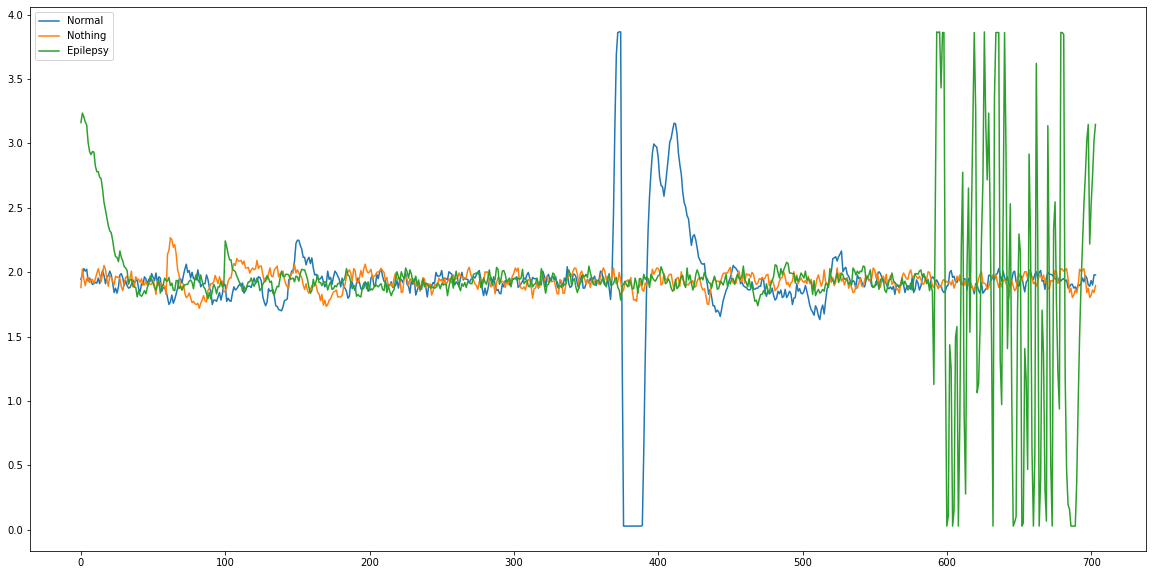

In [112]:

plt.figure(figsize=(20,10))
plt.plot(X_train[0,:])

plt.plot(X_train[1,:])

plt.plot(X_train[4,:])

plt.legend(labels =['Normal','Nothing','Epilepsy'] ,loc="best")

# Evaluating various Machine Learning models on the dataset

## Support Vector Machines

In [20]:
model_SVC = SVC(C =1, kernel  ="rbf")  ## Kernel is radial basis function

In [21]:
model_SVC.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred_SVC = model_SVC.predict(X_test) # Predict labels of the test set

In [23]:
accuracy_svc = accuracy_score(y_test, y_pred_SVC)
accuracy_svc

1.0

Confusion Matrix
 [[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


Text(0.5, 1, 'Confusion Matrix for SVM Model')

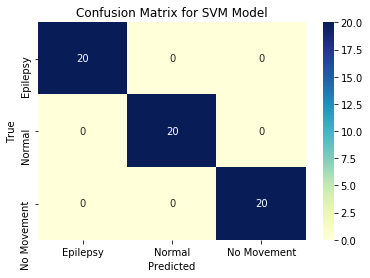

In [24]:
conf_mat_svc = confusion_matrix(y_test, y_pred_SVC)
print('Confusion Matrix\n',conf_mat_svc)
ax = sns.heatmap(conf_mat_svc, annot=True, fmt="d", cmap="YlGnBu", xticklabels = ['Epilepsy', 'Normal', 'No Movement'], yticklabels = ['Epilepsy', 'Normal', 'No Movement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Model')

from sklearn.preprocessing import LabelEncoder
df_encode = LabelEncoder()
LabelEncoder().fit_transform(y_train)



## Logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression

In [136]:
model_logreg = LogisticRegression(penalty='l2',C=0.001, max_iter = 1000)

In [137]:
model_logreg.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_pred_logreg = model_logreg.predict(X_test)

In [139]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_logreg

0.6

Confusion Matrix
 [[ 7  5  8]
 [ 5  9  6]
 [ 0  0 20]]


Text(0.5, 1, 'Confusion Matrix for Logistic Regression Model')

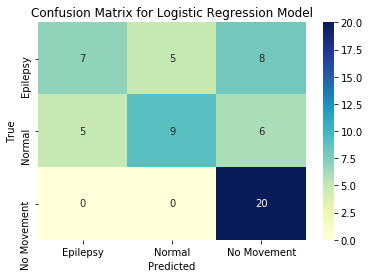

In [30]:
conf_mat_logreg = confusion_matrix(y_test, y_pred_logreg)
print('Confusion Matrix\n',conf_mat_logreg)
ax = sns.heatmap(conf_mat_logreg, annot=True, fmt="d", cmap="YlGnBu", xticklabels = ['Epilepsy', 'Normal', 'No Movement'], yticklabels = ['Epilepsy', 'Normal', 'No Movement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression Model')

## Decision Tree model

In [31]:
from sklearn import tree

In [103]:
model_tree = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_features = 'auto')

In [104]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
y_pred_tree = model_tree.predict(X_test)

In [106]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_tree

0.7666666666666667

Confusion Matrix
 [[15  5  0]
 [ 4 13  3]
 [ 1  1 18]]


Text(0.5, 1, 'Confusion Matrix for Decision Trees Model')

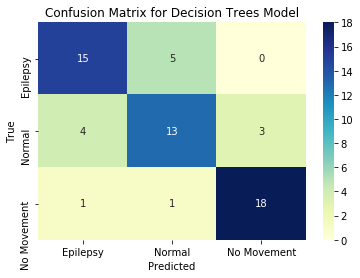

In [107]:
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)
print('Confusion Matrix\n',conf_mat_tree)
ax = sns.heatmap(conf_mat_tree, annot=True, fmt="d", cmap="YlGnBu", xticklabels = ['Epilepsy', 'Normal', 'No Movement'], yticklabels = ['Epilepsy', 'Normal', 'No Movement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Trees Model')

## Gaussian Naive Bayes model

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model_NB = GaussianNB(var_smoothing=0.0)

In [39]:
model_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.0)

In [40]:
y_pred_NB = model_NB.predict(X_test)

In [41]:
accuracy_NB = accuracy_score(y_test, y_pred_NB,sample_weight=None)
accuracy_NB

0.8166666666666667

Confusion Matrix
 [[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


Text(0.5, 1, 'Confusion Matrix for Gaussian Naive Bayes Model')

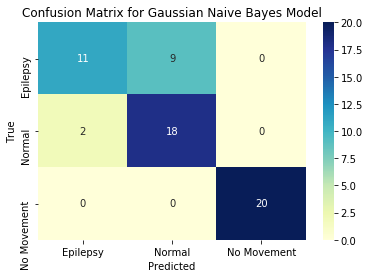

In [42]:
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n',conf_mat_svc)
ax = sns.heatmap(conf_mat_NB, annot=True, fmt="d", cmap="YlGnBu", xticklabels = ['Epilepsy', 'Normal', 'No Movement'], yticklabels = ['Epilepsy', 'Normal', 'No Movement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gaussian Naive Bayes Model')

### K Nearest Neighbor

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model_knn = KNeighborsClassifier(n_neighbors = 1,metric='manhattan')

In [45]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
y_pred_knn = model_knn.predict(X_test)

In [47]:
accuracy_knn = accuracy_score(y_test, y_pred_knn,sample_weight=None)
accuracy_knn


0.55

Confusion Matrix
 [[ 5 11  4]
 [ 0  8 12]
 [ 0  0 20]]


Text(0.5, 1, 'Confusion Matrix for K Nearest Neighbor Model')

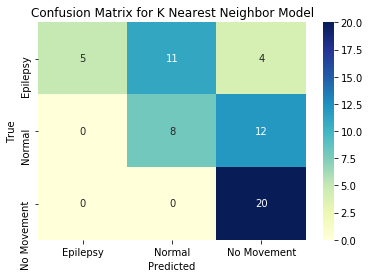

In [48]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix\n',conf_mat_knn)
ax = sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap="YlGnBu", xticklabels = ['Epilepsy', 'Normal', 'No Movement'], yticklabels = ['Epilepsy', 'Normal', 'No Movement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for K Nearest Neighbor Model')

## Extracting features based on mean and variance for K nearest neighbor classification
Now let us transform the features based on their mean and standard deviation and visualize them

In [49]:
## Preprocessing train data
X = []
Y = []
simpleTrain = []
colors = []
for index in range(len(X_train)):
    X.append(np.mean(X_train[index][:]))
    Y.append(np.std(X_train[index][:]))
    simpleTrain.append([np.mean(X_train[index][:]),np.std(X_train[index][:])])
    if(y_train[index]=="Epilepsy"):
        colors.append("r")
    elif(y_train[index]=="Normal"):
        colors.append("b")
    else:
        colors.append("g")

Text(0.5, 1.0, 'Transformed Data')

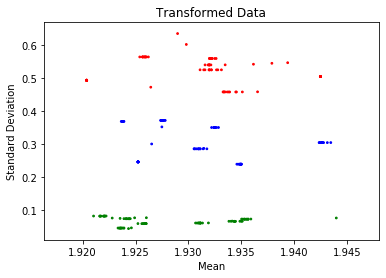

In [50]:
#plotting the train data
plt.scatter(X,Y,s=3,c=colors,norm=[0,2])
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('Transformed Data')

#### From the plot above, we can see clear separation between the three classes based on standard deviation and mean of the data

In [58]:
model_knn_new = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model_knn_new.fit(simpleTrain,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [59]:
## Preprocesing test data
Xt = []
Yt= []
simpleTest = []

for index in range(len(X_test)):
    Xt.append(np.mean(X_test[index][:]))
    Yt.append(np.std(X_test[index][:]))
    simpleTest.append([np.mean(X_test[index][:]),np.std(X_test[index][:])])

In [60]:
y_pred_knn_new = model_knn_new.predict(simpleTest)

In [118]:
accuracy_knn_new = accuracy_score(y_test, y_pred_knn_new)
accuracy_knn_new

1.0

Confusion Matrix
 [[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


Text(0.5, 1, 'Confusion Matrix for K Nearest Neighbor Model on the transformed Data')

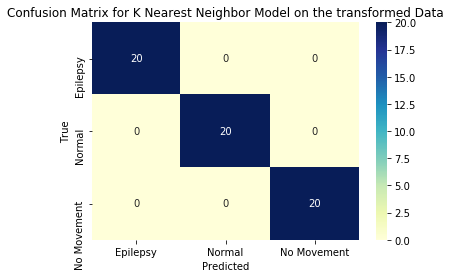

In [114]:
conf_mat_knn_new = confusion_matrix(y_test, y_pred_knn_new)
print('Confusion Matrix\n',conf_mat_knn_new)
ax = sns.heatmap(conf_mat_knn_new, annot=True, fmt="d", cmap="YlGnBu", xticklabels = ['Epilepsy', 'Normal', 'No Movement'], yticklabels = ['Epilepsy', 'Normal', 'No Movement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for K Nearest Neighbor Model on the transformed Data')

In [115]:
def model_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
print(model_accuracy(model_SVC, X_train, y_train,X_test, y_test))

1.0


In [127]:
accuracy_dict = {
    "SVM Model": accuracy_svc,
    "Logistic Regression": accuracy_logreg,
    "Decision Trees Model": accuracy_tree,
    "Gaussian Naive Bayes model": accuracy_NB,
    "K nearest Neighbor model on Original Data": accuracy_knn,
    "K nearest Neighbor model on Transformed Data": accuracy_knn_new
    
}
accuracy_dict

{'SVM Model': 1.0,
 'Logistic Regression': 0.6,
 'Decision Trees Model': 0.7666666666666667,
 'Gaussian Naive Bayes model': 0.8166666666666667,
 'K nearest Neighbor model on Original Data': 0.55,
 'K nearest Neighbor model on Transformed Data': 1.0}

In [129]:
accuracy_df=pd.DataFrame(accuracy_dict.items(), columns=['Models', 'Accuracy Score'])
accuracy_df


,Models,Accuracy Score
0,SVM Model,1.000000
1,Logistic Regression,0.600000
2,Decision Trees Model,0.766667
3,Gaussian Naive Bayes model,0.816667
4,K nearest Neighbor model on Original Data,0.550000
5,K nearest Neighbor model on Transformed Data,1.000000
